## Mean Absolute Error 

$$
Error=\sum\limits_{i=1}^{m}|y-\hat{y}|
$$

In [1]:
data_points = [(2,-2),(5,6),(-4,-4),(-7,1),(8,14)]
total_sum=0
total_sum_squared=0
total_points=len(data_points)

for point in data_points:
    line_y = 1.2*point[0]+2
    diff=point[1]-line_y
    diff_sqr=diff*diff
    if diff<0:
        diff = -1*diff
    else:
        diff = diff
    total_sum+=diff
    total_sum_squared+=diff_sqr
mean_abs_err = total_sum/total_points
print('total_sum:',total_sum)
print('total_points:',total_points)
print('mean_abs_err:',mean_abs_err)
    


total_sum: 19.4
total_points: 5
mean_abs_err: 3.88


## Mean Squared Error 

In [2]:
mean_sqr_err = total_sum_squared/(2*total_points)
print('total_sum_squared:',total_sum_squared)
print('total_points:',total_points)
print('mean_sqr_err:',mean_sqr_err)

total_sum_squared: 106.92000000000002
total_points: 5
mean_sqr_err: 10.692000000000002


## Mini Batch Gradient Descent 

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
# for d20
# df = pd.read_csv('/home/ss-root/Desktop/learning/udacity/ml-tensorflow/mini-gd.csv')
# for windows
df = pd.read_csv('C:\\Users\\sruja\\Desktop\\udacity\\ml-tensorflow\\mini-gd.csv')
df.columns=['x','y']
print(df)

          x        y
0  -2.40724 -0.00156
1   2.64837  3.01665
2   0.36092  2.31019
3   0.67312  2.05950
4  -0.45460  1.24736
..      ...      ...
94 -0.92159  1.21538
95  0.76953  2.39377
96  0.03283  1.55730
97 -1.07619  0.70874
98  0.20174  1.76894

[99 rows x 2 columns]


<AxesSubplot:xlabel='x', ylabel='y'>

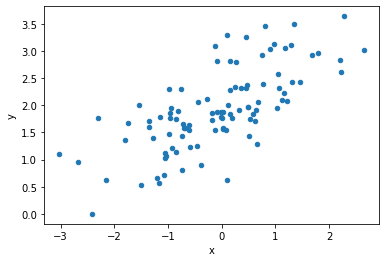

In [8]:
df.plot(kind='scatter',x='x',y='y')

W_new in MSE: [0.08756692]
W_exp: [0.08756692]
b_exp: 0.21009855000000005
b_new in MSE: 0.21009855000000005
W_new in MSE: [0.08438333]
W_exp: [0.08438333]
b_exp: 0.3782916155434828
b_new in MSE: 0.3782916155434828
W_new in MSE: [0.1456094]
W_exp: [0.1456094]
b_exp: 0.5317011118804127
b_new in MSE: 0.5317011118804127
W_new in MSE: [0.17391358]
W_exp: [0.17391358]
b_exp: 0.6617031983331153
b_new in MSE: 0.6617031983331153
W_new in MSE: [0.22205642]
W_exp: [0.22205642]
b_exp: 0.7974949090703743
b_new in MSE: 0.7974949090703743
W_new in MSE: [0.24607785]
W_exp: [0.24607785]
b_exp: 0.908089459886988
b_new in MSE: 0.908089459886988
W_new in MSE: [0.30518412]
W_exp: [0.30518412]
b_exp: 1.0042217947162735
b_new in MSE: 1.0042217947162735
W_new in MSE: [0.34242154]
W_exp: [0.34242154]
b_exp: 1.1013390133705792
b_new in MSE: 1.1013390133705792
W_new in MSE: [0.35234168]
W_exp: [0.35234168]
b_exp: 1.1709675354642788
b_new in MSE: 1.1709675354642788
W_new in MSE: [0.3290308]
W_exp: [0.3290308]
b_e

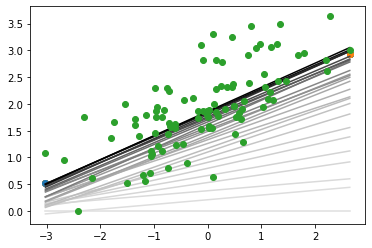

In [47]:
import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
# np.random.seed(42) --


# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # Fill in code
    y_hat = np.matmul(X, W) + b
#     print('X in MSE:',X)
#     print('W in MSE:',W)
#     print('b in MSE:',b)
#     print('y_hat:',y_hat)
#     print('y in MSE:',y)
    errors = y - y_hat
#     print('errors in MSE:',errors)
    
    W_new = W + learn_rate * np.matmul(errors, X)
    print('W_new in MSE:',W_new)
    W_exp = W + np.matmul(errors, X) * learn_rate
    print('W_exp:',W_exp)
    b_exp = b + errors.sum() * learn_rate
    print('b_exp:',b_exp)
    b_new = b + learn_rate * errors.sum()
    print('b_new in MSE:',b_new)
    
    return W_exp, b_exp


# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
        
    return regression_coef


if __name__ == "__main__":
    # perform gradient descent
#     for d20
#     data = np.loadtxt('/home/ss-root/Desktop/learning/udacity/ml-tensorflow/mini-gd.csv', delimiter = ',')
    data = np.loadtxt('C:\\Users\\sruja\\Desktop\\udacity\\ml-tensorflow\\mini-gd.csv', delimiter = ',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # plot the results
    import matplotlib.pyplot as plt
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
#         plt.plot([-3.02296, 2.64837],[X_min * 0.42444267 + 1.81163196, X_max * 0.42444267 + 1.81163196], color = color)
        plt.scatter(X_min, 0.528555875)
        plt.scatter(X_max, 2.93571319)
    plt.scatter(X, y, zorder = 3)
    plt.show()